In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [15]:
# Load the dataset
df = pd.read_csv("fraudTest.csv")
# Replace with the actual path to your dataset

# Display basic information
print(df.info())
print(df['is_fraud'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [16]:
# Drop irrelevant columns
df = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Use a small portion for testing first
X_sample = X_scaled[:10000]
y_sample = y[:10000]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)
print(X_train.shape)  # (7000, number_of_features)
print(X_test.shape)   # (3000, number_of_features)
print(y_train.shape)  # (7000,)
print(y_test.shape)   # (3000,)
print("\nClass distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_test:")
print(y_test.value_counts())



(7000, 1188)
(3000, 1188)
(7000,)
(3000,)

Class distribution in y_train:
is_fraud
0    6985
1      15
Name: count, dtype: int64

Class distribution in y_test:
is_fraud
0    2993
1       7
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Step 1: Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Step 2: Fit all models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {acc:.4f}")




Logistic Regression Accuracy: 0.9987
Decision Tree Accuracy: 0.9987
Random Forest Accuracy: 0.9977


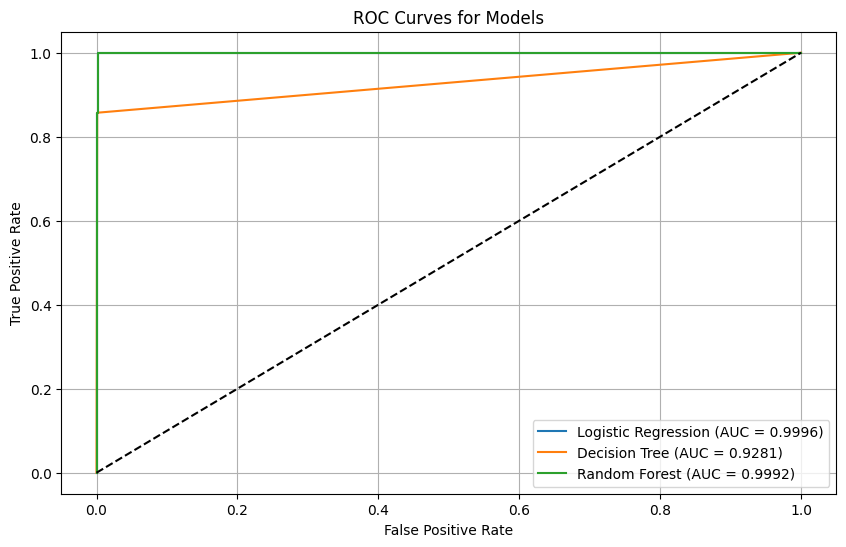

In [9]:
# Step 3: Evaluate with ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')
        except Exception as e:
            print(f"❌ Error in {name}: {e}")
    else:
        print(f"⚠️ {name} does not support predict_proba")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.grid()
plt.show()
